In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Paths
train_path = os.path.join('..', 'data', 'raw', 'NSL-KDD', 'KDDTrain+.csv')
test_path  = os.path.join('..', 'data', 'raw', 'NSL-KDD', 'KDDTest+.csv')

print("Looking for:", os.path.abspath(train_path))
print("Exists?", os.path.exists(train_path))


Looking for: C:\Users\ajayk\DDoS-Hybrid\data\raw\NSL-KDD\KDDTrain+.csv
Exists? True


In [2]:
# load - might need encoding or sep options depending on CSV
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

print("Train shape:", df_train.shape)
print("Test  shape:", df_test.shape)


Train shape: (125972, 42)
Test  shape: (22543, 42)


In [3]:
# See column names (very important — find the label column name)
print(df_train.columns.tolist())
display(df_train.head())


['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal']


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [4]:
# The last column is the label (normal / anomaly)
label_col = df_train.columns[-1]
print("Detected label column:", label_col)

print(df_train[label_col].value_counts())


Detected label column: normal
normal
normal     67342
anomaly    58630
Name: count, dtype: int64


In [5]:
print("Missing values per column:\n", df_train.isnull().sum())
print("Duplicate rows in train:", df_train.duplicated().sum())


Missing values per column:
 0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
dtype: int64
Duplicate rows in train: 9


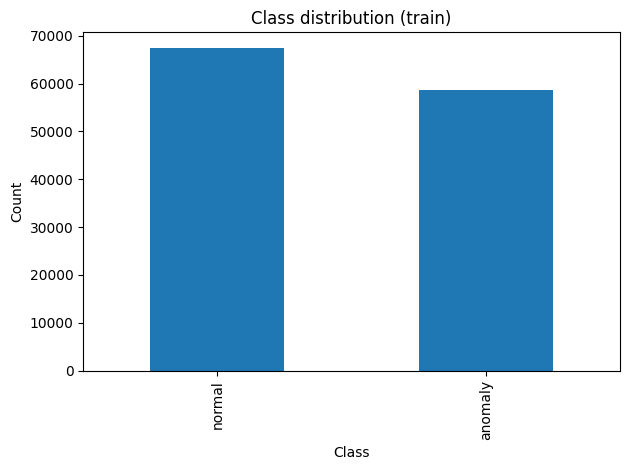

In [6]:
counts = df_train[label_col].value_counts()
counts.plot(kind='bar')
plt.title('Class distribution (train)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [7]:
# Ensure directories exist
os.makedirs(os.path.join('..', 'data', 'sample'), exist_ok=True)
os.makedirs(os.path.join('..', 'data', 'processed'), exist_ok=True)

# 1% sample
sample = df_train.sample(frac=0.01, random_state=42)
sample.to_csv(os.path.join('..', 'data', 'sample', 'train_sample.csv'), index=False)
print("Saved sample to ../data/sample/train_sample.csv")

# Minimal cleaning: drop duplicates, drop missing
df_clean = df_train.drop_duplicates().dropna()
df_clean.to_csv(os.path.join('..', 'data', 'processed', 'train_processed.csv'), index=False)
print("Processed file saved to ../data/processed/train_processed.csv")


Saved sample to ../data/sample/train_sample.csv
Processed file saved to ../data/processed/train_processed.csv
